# Introduction to the dataset


### Title : Why do Kickstarter campaigns fail?
For this project, we used Kickstarter campaigns dataset from Kaggle: https://www.kaggle.com/datasets/thedevastator/most-kickstarter-campaigns-fail-here-s-why

This dataset contains data on 20,632 Kickstarter campaigns as of February 1st, 2017. Important attributes are described below: 
- Project: a finite work with a clear goal that you’d like to bring to life (aka campaign)
- Funding goal: amount of money that a creator needs to complete their project
- Name: name of project on Kickstarter
- Blurb: the short description displayed under the name of your project and on the browse page
- Pledged and backers: amount of money that a project has raised and people that have supported it at the point of the API pull
- State: successful, failed, cancelled, live or suspended.

## 0. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
import numpy as np
from math import pi
import random
import seaborn as sns



## 1. Read CSV file and then load into a data frame

In [2]:
#path= r"kickstarter_data_full.csv"
initdf= pd.read_csv('kickstarter_data_full.csv')
# initdf

/var/folders/jc/s8m7s_9n3q3fhyv_61mvy6zw0000gp/T/ipykernel_89158/2624710421.py:2: DtypeWarning: Columns (30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  initdf= pd.read_csv('kickstarter_data_full.csv')


## 2. Inferred Schema

In [3]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------
# Schema information
initdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        20632 non-null  int64  
 1   Unnamed: 0                   20632 non-null  int64  
 2   id                           20632 non-null  int64  
 3   photo                        20632 non-null  object 
 4   name                         20632 non-null  object 
 5   blurb                        20627 non-null  object 
 6   goal                         20632 non-null  float64
 7   pledged                      20632 non-null  float64
 8   state                        20632 non-null  object 
 9   slug                         20632 non-null  object 
 10  disable_communication        20632 non-null  bool   
 11  country                      20632 non-null  object 
 12  currency                     20632 non-null  object 
 13  currency_symbol 

#### Checking Columns with Null Values

In [4]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

print([col for col in initdf.columns if initdf[col].isnull().any()])

['blurb', 'location', 'category', 'friends', 'is_starred', 'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean']


#### After running the above fucntion, we found out the columns with missing values to handle them.  

#### Columns 'blurb', blurb_len', 'blurb_len_clean', 'location', 'name', 'country', 'is_starred', friends', 'permissions', 'is_backing'  have missing values which are required to be handled. 

## 3. Data Cleaning and Transformations

In [5]:
#Checking rows for which specified column contains null
def nonnullcheck(df, col):
    return df[col][df[col].notna()]

In [6]:
# function to check column values of null values 
def nullcheck(df, col):
    return df[col][df[col].isna()]

#insert the column name for which you wish to check
nullcheck(initdf,'blurb_len_clean') 

1411    NaN
6744    NaN
9239    NaN
11708   NaN
14805   NaN
Name: blurb_len_clean, dtype: float64

In [7]:
#Handling blurb
initdf["blurb"].fillna("Missing blurb", inplace=True)
initdf["blurb_len"].fillna(0, inplace=True)
initdf["blurb_len_clean"].fillna(0, inplace=True)

In [8]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------
initdf[['blurb','blurb_len','blurb_len_clean']]

,blurb,blurb_len,blurb_len_clean
0,MTS ASL Curriculum Workbook is a reproducible ...,21.0,16.0
1,"This kit teaches how to print, correct an ugly...",23.0,15.0
2,"Establishing a free, world-class, public libra...",18.0,10.0
3,Goal: Introducing a new word into the English ...,21.0,13.0
4,Zu den Artikeln der DSGVO sind die korrespondi...,18.0,18.0
...,...,...,...
20627,The easy way to be present for story time anyt...,21.0,16.0
20628,A revolutionary App that makes getting fit as ...,20.0,15.0
20629,"We all love fatbooth and Ugly booth, why not s...",27.0,17.0
20630,Production android app for cab drivers and tru...,8.0,6.0


In [9]:
# Checking null rows for location
nullcheck(initdf,'location')

239      NaN
528      NaN
8444     NaN
9285     NaN
9290     NaN
9303     NaN
9318     NaN
9499     NaN
9506     NaN
9549     NaN
9670     NaN
9715     NaN
9763     NaN
9801     NaN
9903     NaN
9980     NaN
9987     NaN
10045    NaN
10100    NaN
10174    NaN
10235    NaN
10299    NaN
10448    NaN
10466    NaN
10503    NaN
10509    NaN
10525    NaN
10595    NaN
10619    NaN
11557    NaN
11598    NaN
11636    NaN
11706    NaN
11732    NaN
12718    NaN
12843    NaN
13680    NaN
14086    NaN
14252    NaN
14254    NaN
14619    NaN
14631    NaN
14971    NaN
15600    NaN
18337    NaN
Name: location, dtype: object

In [10]:
# HANDLING LOCATION NULL VALUES
# Replacing the Null values in location column with "No Location Specified"
initdf["location"].fillna("No location specified", inplace=True)

In [11]:
# Chekcing 'name', 'location' and 'country' for rows which has unspecified location
initdf[['name', 'location', 'country']][initdf['location'] == "No location specified"]


,name,location,country
239,THE FLUTTERBIES: Sponsor A Concert! Produce a ...,No location specified,US
528,"""The Squad"", Directed by Robyn Griggs",No location specified,US
8444,Photograph the earth from space,No location specified,US
9285,DIA - Designing Interface Architecture (Phase ...,No location specified,US
9290,"MORE JACQUES COUSTEAU, LESS HUCK FINN",No location specified,US
9303,MakerBeam: An Open Source Building Kit,No location specified,US
9318,Offline Wikipedia iPhone app,No location specified,US
9499,sustainable flower nationwide CSA,No location specified,US
9506,The Ficly Server Support Project,No location specified,US
9549,Family Sleep Project,No location specified,US


#### Checking null values in columns: 'is_starred', friends', 'permissions' &'is_backing'.

In [12]:
#Checing the Non-null Values and evaluating their impact. 
nonnullcheck(initdf, 'is_backing')

15831    False
15832    False
15833    False
15834    False
15835    False
15836    False
15837    False
15838    False
15839    False
15840    False
15841    False
15842    False
15843    False
15844    False
15845    False
15846    False
15847    False
15848    False
15849    False
15850    False
15851    False
15852    False
15853    False
15854    False
15855    False
15856    False
15857    False
15858    False
15859    False
15860    False
15861    False
15862    False
15863    False
15864    False
15865    False
15866    False
15867    False
15868    False
15869    False
15870    False
15891    False
15892    False
15893    False
15894    False
15895    False
15896    False
15897    False
15898    False
15899    False
15900    False
15901    False
15902    False
15903    False
15904    False
15905    False
15906    False
15907    False
15908    False
15909    False
15910    False
Name: is_backing, dtype: object

In [13]:
#Checing the Non-null Values and evaluating their impact. 
nonnullcheck(initdf, 'is_starred')

15831    False
15832    False
15833    False
15834    False
15835    False
15836    False
15837    False
15838    False
15839    False
15840    False
15841    False
15842    False
15843    False
15844    False
15845    False
15846    False
15847    False
15848    False
15849    False
15850    False
15851    False
15852    False
15853    False
15854    False
15855    False
15856    False
15857    False
15858    False
15859    False
15860    False
15861    False
15862    False
15863    False
15864    False
15865    False
15866    False
15867    False
15868    False
15869    False
15870    False
15891    False
15892    False
15893    False
15894    False
15895    False
15896    False
15897    False
15898    False
15899    False
15900    False
15901    False
15902    False
15903    False
15904    False
15905    False
15906    False
15907    False
15908    False
15909    False
15910    False
Name: is_starred, dtype: object

In [14]:
#Checing the Non-null Values and evaluating their impact. 

nonnullcheck(initdf, 'friends')

15831    []
15832    []
15833    []
15834    []
15835    []
15836    []
15837    []
15838    []
15839    []
15840    []
15841    []
15842    []
15843    []
15844    []
15845    []
15846    []
15847    []
15848    []
15849    []
15850    []
15851    []
15852    []
15853    []
15854    []
15855    []
15856    []
15857    []
15858    []
15859    []
15860    []
15861    []
15862    []
15863    []
15864    []
15865    []
15866    []
15867    []
15868    []
15869    []
15870    []
15891    []
15892    []
15893    []
15894    []
15895    []
15896    []
15897    []
15898    []
15899    []
15900    []
15901    []
15902    []
15903    []
15904    []
15905    []
15906    []
15907    []
15908    []
15909    []
15910    []
Name: friends, dtype: object

In [15]:
#Checing the Non-null Values and evaluating their impact. 

nonnullcheck(initdf, 'permissions')

15831    []
15832    []
15833    []
15834    []
15835    []
15836    []
15837    []
15838    []
15839    []
15840    []
15841    []
15842    []
15843    []
15844    []
15845    []
15846    []
15847    []
15848    []
15849    []
15850    []
15851    []
15852    []
15853    []
15854    []
15855    []
15856    []
15857    []
15858    []
15859    []
15860    []
15861    []
15862    []
15863    []
15864    []
15865    []
15866    []
15867    []
15868    []
15869    []
15870    []
15891    []
15892    []
15893    []
15894    []
15895    []
15896    []
15897    []
15898    []
15899    []
15900    []
15901    []
15902    []
15903    []
15904    []
15905    []
15906    []
15907    []
15908    []
15909    []
15910    []
Name: permissions, dtype: object

### DROPPING UNNECESSARY COLUMNS


In [16]:
# Since the maximum values columns 'friends', 'is_starred', 'is_backing'& 'permissions' is either Null or inserted by the author which will also not affect out visualisations, we will drop these four columns.

initdf.drop(['friends', 'is_starred', 'is_backing', 'permissions'], inplace=True, axis=1)

In [17]:
# To get the look of new Dataframe
initdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        20632 non-null  int64  
 1   Unnamed: 0                   20632 non-null  int64  
 2   id                           20632 non-null  int64  
 3   photo                        20632 non-null  object 
 4   name                         20632 non-null  object 
 5   blurb                        20632 non-null  object 
 6   goal                         20632 non-null  float64
 7   pledged                      20632 non-null  float64
 8   state                        20632 non-null  object 
 9   slug                         20632 non-null  object 
 10  disable_communication        20632 non-null  bool   
 11  country                      20632 non-null  object 
 12  currency                     20632 non-null  object 
 13  currency_symbol 

In [18]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------
nullcheck(initdf, 'category')

120      NaN
121      NaN
122      NaN
123      NaN
124      NaN
        ... 
19579    NaN
19580    NaN
19581    NaN
19582    NaN
19583    NaN
Name: category, Length: 1889, dtype: object

In [19]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

nonnullcheck(initdf, 'category')

0        Academic
1        Academic
2        Academic
3        Academic
4        Academic
           ...   
20627        Apps
20628        Apps
20629        Apps
20630        Apps
20631        Apps
Name: category, Length: 18743, dtype: object

In [20]:
#For all the Null values in categories, we are grouping them and assigning them a value for a cleaner outlay of the dataset.

initdf[['name','category']][initdf['category']=="Uncategorized"]

,name,category


In [21]:
# Handling categories
initdf["category"].fillna("Uncategorized", inplace=True)

In [22]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

#check if all null values have been handled
print([col for col in initdf.columns if initdf[col].isnull().any()])

['name_len', 'name_len_clean']


In [23]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------


nonnullcheck(initdf, 'name_len')

0        11.0
1         4.0
2         8.0
3         7.0
4         7.0
         ... 
20627     8.0
20628     2.0
20629     3.0
20630     1.0
20631     3.0
Name: name_len, Length: 20627, dtype: float64

In [24]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------


nullcheck(initdf, 'name_len')

1411    NaN
6744    NaN
9239    NaN
11708   NaN
14805   NaN
Name: name_len, dtype: float64

In [25]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------


initdf[['name','name_len','name_len_clean']][initdf['name_len']==0.0]

,name,name_len,name_len_clean


In [26]:
# DROPPING INCOMPLETE DATA ROWS

initdf.drop(labels=[1411,6744,9239,11708,14805], axis=0, inplace=True)

In [27]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------
# Checking for Null values in Dataframe

initdf.isnull().values.any()

False

## VALIDATION TEST CELLS 

In [28]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

# initdf.info()

In [29]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

# Checking count of categories by their states
# initdf.groupby("state")[["category"]].count()

In [30]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

# Count the number of unique values
# initdf[["category","state"]].nunique()

In [31]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

# List number of unique values
# initdf["state"].unique()

In [32]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

# initdf["category"].unique()

### CREATING DATAFRAMES BY STATE


In [33]:
failed_df = initdf[initdf["state"] == "failed"].groupby(["category"])[['state']].count().reset_index()
successful_df = initdf[initdf["state"] == "successful"].groupby(["category"])[['state']].count().reset_index()
canceled_df = initdf[initdf["state"] == "canceled"].groupby(["category"])[['state']].count().reset_index()
live_df = initdf[initdf["state"] == "live"].groupby(["category"])[['state']].count().reset_index()
suspended_df = initdf[initdf["state"] == "suspended"].groupby(["category"])[['state']].count().reset_index()

### CREATING DEFAULT DICTIONARY FOR STATES

In [34]:


categories_dict = {
    'Academic':0,
    'Places':0,
    'Uncategorized':0,
    'Blues':0,
    'Restaurants':0,
    'Webseries':0, 
    'Thrillers':0, 
    'Shorts':0, 
    'Web':0, 
    'Apps':0, 
    'Gadgets':0,
    'Hardware':0, 
    'Festivals':0, 
    'Plays':0, 
    'Musical':0, 
    'Flight':0, 
    'Spaces':0,
    'Immersive':0, 
    'Experimental':0, 
    'Comedy':0, 
    'Wearables':0, 
    'Sound':0,
    'Software':0, 
    'Robots':0, 
    'Makerspaces':0
}

In [35]:
#    METHOD TO RETURN SERIES PER STATE FOR VISUALIZATION
def populating_state_series(df):

    shallow_copy = categories_dict.copy()
    for i in range(len(df)):
        if df['category'][i] in shallow_copy:
            shallow_copy[df['category'][i]] = df['state'][i]
#     print(shallow_copy)
    return list(shallow_copy.values())

In [36]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------

# categories_dict

In [37]:
# CALLING METHOD TO RETURN SERIES PER STATE FOR VISUALIZATION

categories = list(categories_dict.keys())
failed = populating_state_series(failed_df)
successful = populating_state_series(successful_df)
canceled = populating_state_series(canceled_df)
live = populating_state_series(live_df)
suspended = populating_state_series(suspended_df)

In [38]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------


# print(categories)
# print(successful)
# print(failed)
# print(canceled)
# print(live)
# print(suspended)


In [39]:
# VALIDATION TEST CELL -------------------------------------------------------------------------------------------------


# print(len(canceled), len(successful), len(live), len(suspended), len(failed))
# states = list(initdf["state"].unique())
# print(states)

# 4. VISUALISATIONS

## 4.1 BAR CHART 

In [40]:
from bokeh.plotting import figure, show
from bokeh.plotting import show, output_notebook, output_file
output_notebook()

categories = list(categories_dict.keys())
states = list(initdf["state"].unique())
colors = ["orange", "red", "green","blue", "silver"]

data = {'categories' : categories}
data['failed'] = populating_state_series(failed_df)
data['successful'] = populating_state_series(successful_df) 
data['canceled'] = populating_state_series(canceled_df)
data['live'] = populating_state_series(live_df)
data['suspended'] = populating_state_series(suspended_df)
 

# print(data)
p = figure(x_range=categories, height=500, title="States of Kicstarter by Categories",
           toolbar_location=None, tools='hover', tooltips="$name @categories: @$name")

p.vbar_stack(states, x='categories', width=0.9, color=colors, source=data,
             legend_label=states)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = 'Categories'
p.yaxis.axis_label = 'No.of Kickstarters'


show(p)


Loading BokehJS ...

### 4.1.1 Inference from the Graph

- We have total 25 Categories which contain 20627 kickstarters combined. 



- Top 5 famous categires with most kickstarters are:
    1. Web 
    2. Hardware 
    3. Software 
    4. Gadgets 
    5. Uncategorized 
    
    
- Top 5 Successful categories are:
    1. Hardware 
    2. Uncategorized
    3. Plays
    4. Gadgets
    5. Musical
    
    
- Top 5 Failed catergories are:
    1. Web 
    2. Software
    3. Hardware 
    4. Gadgets 
    5. Uncategorized 
  


In [41]:
# METHOD TO RETURN Categories PER STATE FOR VISUALIZATION

def populating_categories_dictionary(df):
    shallow_copy = categories_dict.copy()
    for i in range(len(df)):
        if df['category'][i] in shallow_copy:
            shallow_copy[df['category'][i]] = df['state'][i]
#             shallow_copy['academic'] = 20
#     print(shallow_copy)
    return shallow_copy

## 4.2 PIE CHART

In [42]:
from math import pi
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.palettes import Category20c
import random
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import LabelSet, ColumnDataSource

output_notebook()

pie_colors=['#039d72','#45BA7E','#de324c', '#f4895f', '#f8e16f',
            '#95cf92','#369acc','#9656a2','#B74E09','#61B22E',
            '#4B2DF7','#5EB999','#5DBDE7','#DD629B','#B2A6A3',
            '#C9212C','#E63DC4', '#A13C50','#4E4327','#76A9CA',
            '#DD7C03','#DD7C03','#80D077','#D84CE4', '#D67956']


total_df = initdf.groupby("category")["state"].count().reset_index()
x = populating_categories_dictionary(total_df)
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'category'})
# print(data)

data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = ['#039d72','#45BA7E','#de324c', '#f4895f', '#f8e16f',
            '#95cf92','#369acc','#9656a2','#B74E09','#61B22E',
            '#4B2DF7','#5EB999','#5DBDE7','#DD629B','#B2A6A3',
            '#C9212C','#E63DC4', '#A13C50','#4E4327','#76A9CA',
            '#DD7C03','#DD7C03','#80D077','#D84CE4', '#D67956']

p = figure(plot_height=800, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@category: @value", x_range=(-0.8, 1.8))

p.wedge(x=0, y=1, radius=0.8,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='category', source=data)

data["value"] = data['value'].astype(str)
data["value"] = data["value"].str.pad(35, side = "left")
source = ColumnDataSource(data)

labels = LabelSet(x=0, y=1, text='value',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p.add_layout(labels)

p.axis.axis_label=None
p.axis.visible=False
# p.grid.grid_line_color = None

show(p)

Loading BokehJS ...

### 4.2.1Inference from the Pie Chart


- The above visualisation consist of a simple pie chart showing distribution of all the Kickstarters in various categories



- Pie chart suggests that most of the kickstarters are famous amongts the following categories:
   1. WEB
   2. HARDWARE
   3. SOFTWARE
   4. GADGETS
   5. UNCATEGORIZED

##### CREATING A DATAFRAME FOR LINE CHART

In [43]:
# Using Groupby, Checking count of kickstarter(name) by their launch year which have state as successful. 

initdf[initdf['state'] == 'successful'].groupby('launched_at_yr')['name'].count()

launched_at_yr
2009      15
2010      62
2011     125
2012     262
2013     524
2014    1400
2015    1984
2016    1602
2017      44
Name: name, dtype: int64

In [44]:
# Using Groupby, Checking count of kickstarter(name) by their launch year which have state as Failed. 

initdf[initdf['state'] == 'failed'].groupby('launched_at_yr')['name'].count()

launched_at_yr
2009      26
2010     118
2011     134
2012     227
2013     565
2014    3132
2015    4241
2016    2894
2017      79
Name: name, dtype: int64

In [45]:
# CALLING METHOD TO RETURN SERIES PER Launch Year  FOR VISUALIZATION

# This method will call all the kickstarters according to their launch year.
total_by_yr = initdf.groupby(['launched_at_yr'])[['name']].count().reset_index()

# This method will call all the sucessful kickstarters according to their launch year.
successful_by_yr = initdf[initdf['state'] == 'successful'].groupby('launched_at_yr')['name'].count().reset_index()

# This method will call all the failed kickstarters according to their launch year.
failed_by_yr = initdf[initdf['state'] == 'failed'].groupby('launched_at_yr')['name'].count().reset_index()



In [46]:
# VALIDATION TEST CELL ------------------------------------------------------------------------------------------------
#list(successful_by_yr['name'])

## 4.3 LINE GRAPH

In [47]:
from bokeh.plotting import figure, show
# prepare some data
x = list(total_by_yr['launched_at_yr']) #list of years
y1 = list(total_by_yr['name']) #count(name/anything) for total by year 
y2 = list(failed_by_yr['name']) #count(name/anything) for failed by year 
y3 = list(successful_by_yr['name']) #count(name/anything) for successful by year 

# create a new plot with a title and axis labels
p = figure(title="Total campaign vs Success/Failure rate", x_axis_label="Year", y_axis_label="Value", plot_width = 600, plot_height = 400)

# add multiple renderers
p.line(x, y1, legend_label="Total.", color="blue", line_width=2)
p.line(x, y2, legend_label="Failed", color="red", line_width=2)
p.line(x, y3, legend_label="Successful", color="green", line_width=2)
# show the results


show(p)

### 4.3.1 Inference from Line Graph

- The graph shows the camparision between the Total campaigns, the total Failed and succesful campaign

- From the graph we can infer that, there are more number of failed campaings than successful ones. 

- Most of the campaigns from this dataset is from the year 2013 to year 2018.


## 4.4 HEAT MAP

/var/folders/jc/s8m7s_9n3q3fhyv_61mvy6zw0000gp/T/ipykernel_89158/3065999357.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlGn").copy()
  color.set_bad('maroon')


HeatMap


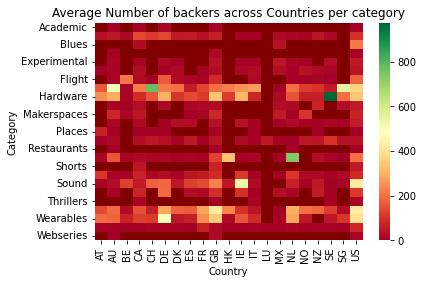

In [48]:
pivot_table= initdf.pivot_table(index="category",columns="country",values="backers_count",aggfunc='mean')
color = plt.get_cmap('RdYlGn') 
color.set_bad('maroon')
sns.heatmap(pivot_table,cmap=color)
plt.title('Average Number of backers across Countries per category')
plt.xlabel('Country')
plt.ylabel('Category')
print("HeatMap")

### 4.4.1 Inference from Heat Map

- The heat map shows that for certain categories like Gadgets, Hardware and Robots, there are a large number of backers in a single particular country such as China, Sweden and the Netherlands respectively for these categories. So launching these type of kickstarters in these countries will increase their success rate.

- There are a lot of bad values being seen in the heat map marked which are marked in maroon, which indicates that a huge number of kickstarters launched have 0 backers which contributes to them failing.


## 4.5 HISTOGRAM

Text(0, 0.5, 'Number of Campaigns')

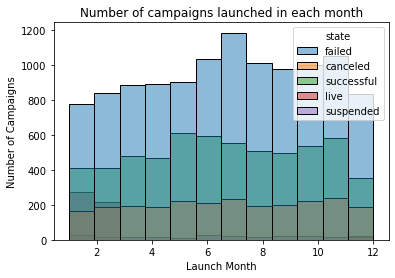

In [49]:
sns.histplot(data=initdf,x="launched_at_month",hue="state",bins=12)
plt.title('Number of campaigns launched in each month')
plt.xlabel('Launch Month')
plt.ylabel('Number of Campaigns')

### 4.5.1 Inference from Histogram

- We can infer from the histogram that, there is a high success rate for kickstarters launched from May to June. We can use this inference and increase the success rate of kickstartes by launching them in those particular months.


- The failure rate seems to be high during December and January and it would be best to avoid those months for starting new projects.

## 4.6 BOXPLOT

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


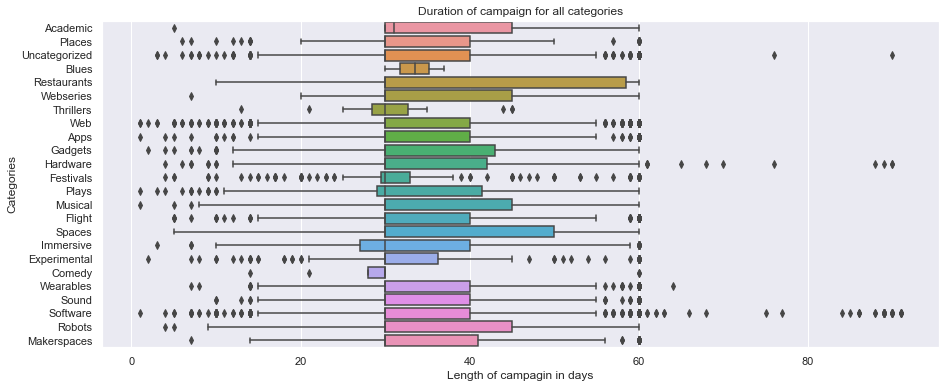

In [50]:
initdf['usd_goal'] = initdf['goal']*initdf['static_usd_rate'] # To convert currency of goal to US currency
boxdf = initdf[['category','SuccessfulBool', 'state', 'launch_to_deadline_days']]
boxdf.groupby(initdf.category).mean().reset_index()
failed = boxdf[boxdf['SuccessfulBool']==0][['launch_to_deadline_days','category' ,'state']]
success = boxdf[boxdf['SuccessfulBool']==1][['launch_to_deadline_days','category','state']]
x = failed['launch_to_deadline_days']
y = failed['category']
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x,y)
plt.title('Duration of campaign for all categories')
plt.xlabel('Length of campagin in days')
plt.ylabel('Categories')
plt.savefig('boxplot.png')

## 4.6.1 Inference from boxplot
- It is recommended from the kickstarter webiste that for a campaign to have higher chances of success, its better to have the campaign duration of 30 days or less. 
- From the visualization, it can be infered that most of the failed projects are run for more than 40-60 days. 
- From the outliers, we can infer that most of the campaigns failed because their duration was too less to have enough time to gather enough funding or run for a long period 50 days and above.

## 4.7 Scatter Plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


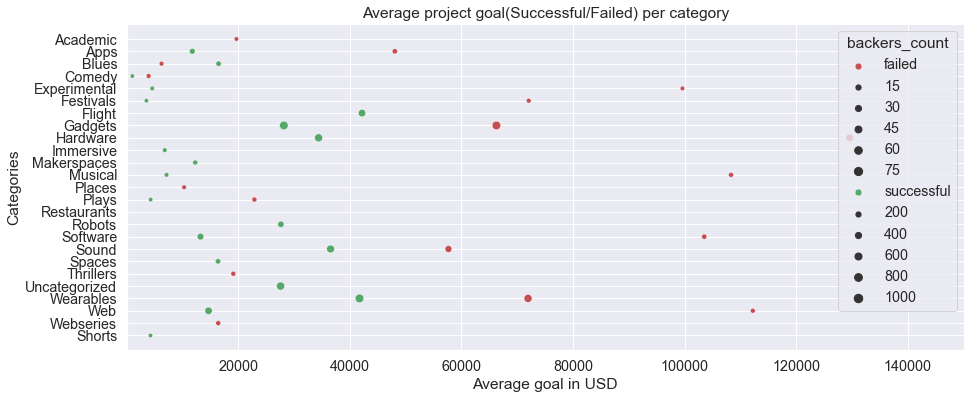

In [51]:
scatterdf = initdf[['usd_goal','category','usd_pledged','SuccessfulBool', 'state','backers_count']]
# filtering the failed projects 
failed = scatterdf[scatterdf['SuccessfulBool']==0][['usd_goal','backers_count','category' ,'usd_pledged','state']]
# filtering the successful projects
success = scatterdf[scatterdf['SuccessfulBool']==1][['usd_goal','backers_count','category' ,'usd_pledged','state']]
sns.set(font_scale=1.3)
#Extracting average values for all categories
avg1 = failed.groupby(initdf.category).mean().reset_index()
avg2 = success.groupby(initdf.category).mean().reset_index()
fig, ax = plt.subplots()
sns.scatterplot(avg1['usd_goal'],avg1['category'], size = avg1['backers_count'], color='r', label='failed')
sns.scatterplot(avg2['usd_goal'],avg2['category'], size = avg2['backers_count'], color='g', label='successful')
ax.set_xlim(1, 150000)
plt.title('Average project goal(Successful/Failed) per category')
plt.xlabel('Average goal in USD')
plt.ylabel('Categories')
plt.savefig('scatterplot.png')
plt.show()

## 4.7.1 Inference from Scatter Plot
- Across all categories, the campaigns are most likely to be successful if their funding goal is below 20,000 dollars.
- The median goal amount of successful projects is 6,000 dollars while failed projects is 1,15,171 dollars which is more than double the successful projects. 
- This suggests that projects with a conservative goal are more likely to attract backers.
- We can also see that failed projects across all categories have higher funding goals than successful ones. 
- It can be infered that Gadgets, Hardware and wearables attract more backers.

##  5. Conclusion


### 5.1 Insights from the visualizations
Kickstarter data has a lot of valuable insights to offer. Findings from our analysis:

- The average success ratio of campaign on KickStarter is about 29% from 2008-2017.
- Top 5 successful categories are Web, Hardware, Software, Gadgets and Uncategorized. 
- For hardware, kickstarter is found to be most popular in countries like China, Sweden and Netherlands as these countries have more average number of backers.
- The median goal amount for a successful project is found to be USD 6,000.
- Success ratio of campaigns was on a increasing trend from 2013 to 2015. Post 2015 there is a gradual downfall in the success ratio of the campaigns.
- Success rate is found to be higher in the period of May to June. 
- The failure rate seems to be high during December and January.
- Any kickstarter which is run for a duration longer than 30 days is mostly likely to fail across all categories.

### 5.2 Reasons of Failure

Crowdfunding has become increasing popular in the world as a form of alternative financing for new projects.
1. Market research failure
2. Product not been promising enough
3. Running out of cash
4. Over ambitious projects
5. Business model failure
6. Deadline extended forever

## 6. Scope for future analysis

### 6.1 Columns to be inserted for better visualizations
1. Marketing Budget
2. Backers Feedback
3. Duration of time it was live

### 6.2 Insights on future analysis

1. Market Research: Good market research plays a crucial role in the Success or Failure of any Kickstarter. 
2. Branding of the Campaign: Often developers focus too much on creating a product they often spend less time on branding their product. The title is too lame, the blurb doesn't provide a detailed insight on what the campaign is about. 
3. Marketing the Product: Marketing does look like an additional cost to many developers and hence they overlook it, but it should rather be considered as a RETURN OF INVESTMENT. Since the kickstarter is dependent on the community to fund their project even before it has been finished, it is important to market it smartly, so that it reaches maximum audience and attracts potential backers.
4. Realistic Goals: Often with lack of market research and product knowledge, developers set goals which are too high to reach and hence the kickstarter often turns into a failure. 
5. Unprofessionalism: A biggest mistake amongst most of the kickstarter is not updating backers on the progress of the project. Not being in touch too often. And not completing within a deadline. 
6. Consumer Analysis: Having a sheer knowledge on which market has what percentage of consumers is crucial. Laying out surveys and collecting statistics on what a consumer wants will always give better results and kickstarters should consider that. 
7. Right Timing: Timing is everything, be it for asking for funding, launching a product or marketing it. One should know the best time as per the market for every scenario.
8. Test
9. Adding updates